In [131]:
from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


In [132]:
df_place = pd.read_excel(".\data\dataset.xlsx")
df_place
# df_place.to_csv("new_df_place",index=False,encoding='utf-8-sig')


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Heram\AppData\Local\Temp\ipykernel_13916\3830384026.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_place = pd.read_excel(".\data\dataset.xlsx")


,city_name,lat,lon,population
0,tehran,35.688889,51.389722,9000000
1,tabriz,38.066600,46.299990,1857877
2,shiraz,29.616667,52.533330,1955500
3,mashhad,36.326389,59.543333,3001184
4,esfahan,32.644722,51.667500,1961260
5,sari,36.560556,53.058333,920000
6,qom,34.640000,50.876389,1060000
7,semnan,35.583333,53.383333,185000
8,yazd,31.897222,54.367500,529673


In [133]:
#sorting df with population
df_place = df_place.sort_values(by="population", ascending=False)
df_place

,city_name,lat,lon,population
0,tehran,35.688889,51.389722,9000000
3,mashhad,36.326389,59.543333,3001184
4,esfahan,32.644722,51.667500,1961260
2,shiraz,29.616667,52.533330,1955500
1,tabriz,38.066600,46.299990,1857877
6,qom,34.640000,50.876389,1060000
5,sari,36.560556,53.058333,920000
8,yazd,31.897222,54.367500,529673
7,semnan,35.583333,53.383333,185000


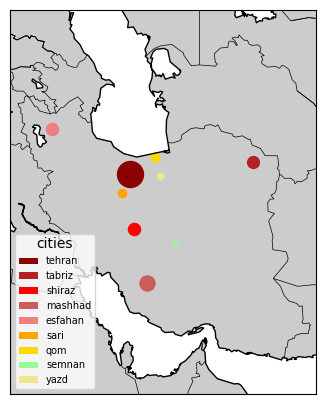

Text(0.5, 1.0, 'Iran')

In [134]:
# create new figure, axes instances.
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=43.5,llcrnrlat=23.,urcrnrlon=63.7,urcrnrlat=44.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40,lon_0=-40.,lat_ts=20.)

m.drawcoastlines()
m.fillcontinents()
m.drawcountries()
m.drawcounties()
m.drawstates()

colors = ["darkred","firebrick","red","indianred","lightcoral","orange","gold","palegreen","khaki"]
counter = 0
legend_elements = []

for i , j in zip(df_place["lon"],df_place["lat"]):
    x, y = m(i, j)
    m.scatter(x, y, s=350*(df_place["population"][counter] / df_place["population"][0]), color=colors[counter] , label = df_place["city_name"][counter])
    legend_elements.append( Patch(facecolor = colors[counter],label = df_place["city_name"][counter]))
    counter += 1

plt.legend(handles = legend_elements ,title="cities", loc="lower left", fontsize=7)
plt.show()
ax.set_title('Iran')